# 워드 클라우드

In [3]:

from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [4]:
text = open('data/wc1.alice.txt').read()
alice_mask = np.array(Image.open('data/wc2.alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [5]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [6]:

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

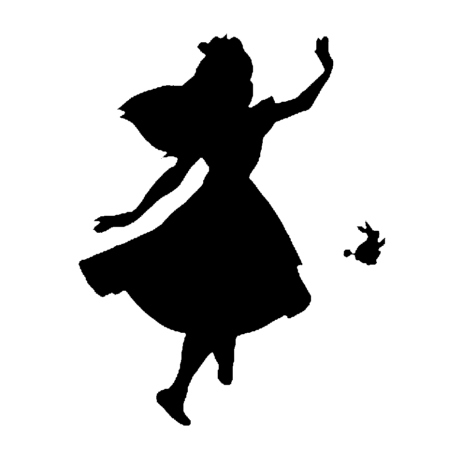

In [7]:

plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [9]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.25956284153005466,
 'know': 0.2459016393442623,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'now': 0.16393442622950818,
 'went': 0.15846994535519127,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'well': 0.14754098360655737,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'head': 0.13114754098360656,
 'What': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11

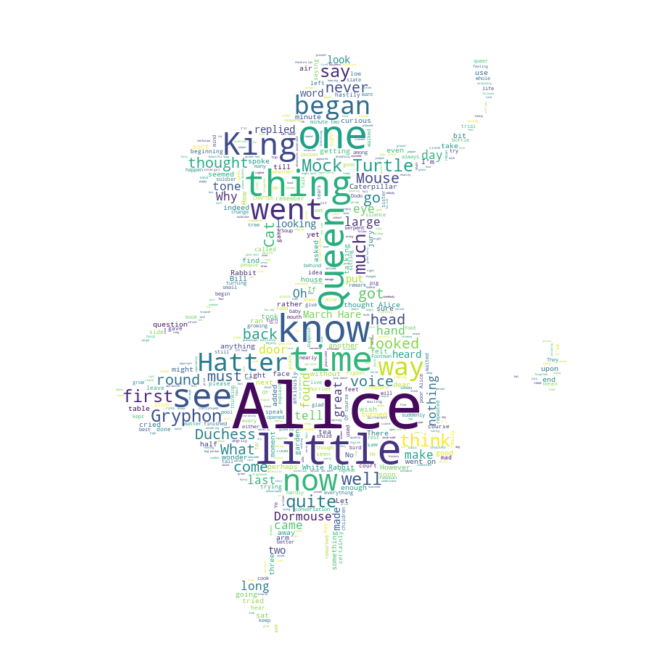

In [10]:

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# star Wars - A new hope

In [11]:
text = open('wc3.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('wc4. stormtrooper_mask.png'))

In [12]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [13]:

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [14]:

import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [15]:

s = 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
s

'hsl(0, 0%, 79%)'

In [16]:
text_ = [word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

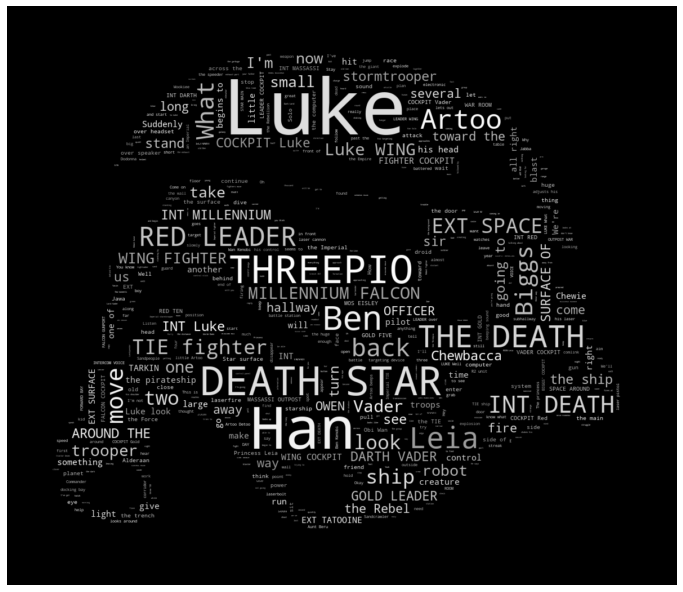

In [17]:

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()


# 여자 친구 선물 고르기

In [18]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [19]:
tmp1 = 'https://kin.naver.com/search/list.nhn?'
html = tmp1 + '&query={key_word}&page={num}'
response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [20]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:5]

['\n\n천여여친 선물 추\n\n2020.06.22.\n천여여친 선물 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여친선물로 뭘 줘야 할까요?\n\n2020.05.21.\n여친선물로 뭘 줘야 할까요?  안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n아빠가 어제 카드 주셔서 여친 선물\n\n2020.02.04.\n아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n정품문의 답변즘여 여친선물인데....\n\n2020.01.29.\n... 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다. 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요; \n\nQ&

In [21]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
            line_str = line.text.replace('\t', '').replace('\n','').replace('\xa0', ' ')
            present_candi_text.append(line_str)

        
    time.sleep(0.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [22]:
with open("data/21_present_candi.txt", "w",-1,'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [23]:
len(present_candi_text)

1000

In [24]:
present_text = ''

for each_line in present_candi_text:
    present_text = present_text + each_line + '\n'

In [25]:
from konlpy.tag import Okt
okt= Okt()

In [26]:
gifts= okt.nouns(present_text)
gifts[:10]

['여자친구', '선물', '여자친구', '독립', '축하', '기념', '선물', '여자친구', '선물', '양해']

In [45]:
import nltk
gifts = nltk.Text(gifts, name='여자 친구 선물')
print(len(gifts.tokens))
print(len(set(gifts.tokens)))

25756
704


In [47]:
gifts.vocab().most_common(100)

[('선물', 3025),
 ('여자친구', 2952),
 ('목걸이', 2607),
 ('수', 2005),
 ('추천', 1955),
 ('답변', 1033),
 ('때', 878),
 ('중', 865),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 515),
 ('결혼', 369),
 ('고민', 299),
 ('상담', 144),
 ('쥬니버', 142),
 ('이성', 142),
 ('네이버', 137),
 ('용법', 137),
 ('가족', 77),
 ('이벤트', 77),
 ('초', 77),
 ('내공', 75),
 ('행사', 74),
 ('고', 71),
 ('중학생', 68),
 ('문구', 64),
 ('만년필', 62),
 ('미술', 62),
 ('용품', 62),
 ('좀', 46),
 ('제', 41),
 ('화장품', 34),
 ('뭐', 33),
 ('생각', 27),
 ('여자', 23),
 ('생일', 22),
 ('지갑', 22),
 ('화이트데이', 21),
 ('걸', 20),
 ('요', 20),
 ('저', 19),
 ('향수', 17),
 ('것', 16),
 ('가격', 16),
 ('크리스마스', 16),
 ('거', 15),
 ('이번', 15),
 ('커플', 14),
 ('로', 13),
 ('질문', 13),
 ('뭘', 12),
 ('게', 11),
 ('꽃', 11),
 ('반지', 11),
 ('쇼핑', 11),
 ('감동', 10),
 ('살', 10),
 ('브랜드', 9),
 ('기념일', 9),
 ('가방', 9),
 ('진짜', 9),
 ('의미', 9),
 ('곧', 9),
 ('정도', 9),
 ('전', 9),
 ('목도리', 9),
 ('중반', 8),
 ('친구', 8),
 ('카드', 8),
 ('이제', 8),
 ('팔찌', 8),

In [48]:
sw_text = ' '.join([str(elem) for elem in set(gifts.tokens)])
print(sw_text)

시간 불가리 비 자주 송이 좀 왜 팟 진 정성 모두 쇼핑 처럼 빼빼로데이 별로 목걸이 블루투스 중동 밍 초등학교 일주년 지방선거 도대체 구영 녹음기 선물 기억 최근 얼마 개 아이폰 미투데이 고수 대학입학 톤 종류 기분 마음 점점 주년 처음 크게 코미디 택배 점 만들기 학년 저녁 고등학교 군 정식 글 가요 강남 음질 홍 분 메트로 정해 해 때문 음향 보증 조금 화장품 스 그룹 폭시 워터 광장 저가 저번 내공 한번 포함 사랑 다음 틴트 실용 축하 캠코더 레이스 등등 의식 고등학생 거도 오늘 한민 졸업식 근방 향수 카드 가기 르블랑 활용 대해 그것 사실 색깔 백화점 류량 정말 연락 렐라 여동생 퍼온거 그랜피 고향 구류 입문 차라리 이니스프리 이내 생일 오락 펜던트 언니 취업 여행 쿠키 학교생활 말 정 금 심즈 피스 텀블러 우정 놀이 길찾기 신고 후반 화이트데이 투맨 귀걸이 영화 위 무료 하루하루 피 영상 준비 가족 구피 용 이제 때 하트 외 박 미술 철 용인 래서 민원 직업 슬 포니테일 햇빛 가격 행사 도움 미만 브드 손가락 이번 폰 제대로 가전 라면 전 용산 이요 일 한편 독립 중반 시구 상큼 너 취미 질문 뷰티 주니 볶음 해도 반 곧 용도 가을 중고 의견 감동 중 초등학생 줄 쪽 둘 주문 부담 포에버 중후 일주일 크롬 티나 맥 러브레터 오빠 스탠드 명품 이틀 디자인 신발 가발 완전 셜 무스 현재 파티 사서 제이콥 가죽 우선 려고 봣 안주 스카프 재회 모델 후 광역 스마트폰 순간 이성 사주면 다이아 애 테크 님들 은행 장미꽃 거 럼 노미 용품 집업 메이커 셀 매 편도 접 이자 사이트 인형 천연 추억 주위 내내 술 결과 동갑 리버 성분 괜찬을듯해 드림 플라워 것 의류 세럼 오세아니아 대학생 이면 예비 기타 건강 악세사리 글구 적 고민 구 클러치 움 입생로랑 노트북 사업자 이하 부탁 브랜드 플립 끼 티 패션 비비드 잡화 하여튼 밥 빵 다시 수 가게 청계 용법 생활 무난 초반 발렌타인 초콜릿 하카 날 네이버 전역 누가 다른 목도리 머 인 하니 떄 값 서울 립스틱 잉크 

In [32]:
sw_text = """아이디어 최근 채팅 구 지역 답변 밥 크게 돈 움
쪽 인 공주 호 
연상연하 정도 일 음향 이벤트 속옷 말씀 천연 친구 상품 암거 래서 브랜드 포에버 샤넬 메트로 
포토 마리오 가장 넥타이 건즈더듀얼 정말 찬 만년필 대비 술 제일 중동 피부 제품 지방선거 사서 종합
커플티 부담 시티 기타 주 자주 루이비통 중학생 유얼 가성 아래 미리 커플 내내 때문 하나 전 폭시 토 
게 최고 드림캐쳐 경우 목 안 꽃집 건 오세아니아 뷰티 직접 오즈 초딩 고생 의류 추천 사이트 비비드 남자 
잡화 대학입학 니트 갤럭시 존경 오늘 베스트 약 일찍 최대 연말 곧 녹음기 루이까또즈 적 팔찌 이번 적극 플립
중지 다음주 정 음식 박 햇빛 발찌 대해 가전 뭘 택배 기억 신고 은행 막상 지식인 옷 빼빼로데이 머 행사 방송 
텀블러 욕설 가족 저번 인터넷 확인 거도 쭈니 여자친구 여동생 민원 토닥토닥 하루하루 항상 건조과일 주문 
크리스마스 가요 크롬 전화 밍 이제 스 렐라 학교생활 포함 게이 백화점 구피 기도 학생 관리 루나 로즈데이 
지갑 학년 손편지 번 프리저 블랙베리 데이 일주년 철 말 고해 집업 만들기 해 여행 어쨌든 땜 전자담배 내공
동안 빨강 후 고 중 원데이 이요 구류 럼 고향 플랫슈즈 입문 바 사주면 용도 요 쥬얼리 초소 활용 대면 가죽
워터 티셔츠 셀 영화 기분 악세사리 가을 거의 부 한지 계획 더 얼마 데 생활 지금 소개 에센스 행동 혹시 꾸띠르 
전후 려고 링 봣 거리 테크 제 작업 노트북 메이커 스탠드 이 축하 스킨 색 꽃 모두 벌써 수제 신경 예비 머그컵
투맨 동갑 목걸이 쪼금 애 현금 준비 디올 향수 상담 차라리 기념 저가 를 누가 언니 저 리스트 고등학생 처음 문제 
컬러 발레 체크 잉크 겨울 화장 다이아 케이스 의견 진짜 한민 함 우정 규어 졸업 따뚜아쥬 러브레터 피 루미 개 화장품
만 하여튼 안주 서여 건강 팩트 핸드폰 가방 세트 분 언제 하니 에스티 편지 성의 정해 영상 그동안 예상 원래 매일 행정 
초등학생 무협 자 덕후 전역 곳 류량 진 교환학생 상자 글 부탁 종류 코튼 가지 연인 하카 향기 미만 결과 왜 해주시 사실
빵 겟잇뷰티 이틀 담배 이하 중반 오락 며칠 아이템 펜션 초콜릿 티나 무스 틴트 제대로 미투데이 고요 섬유 후드 공예 카메라 
감동 뭐 너 시계 재료 티니 가게 미술 전여자친구 길찾기 마디 한번 대학생 발렌타인데이 얼굴 대도 반지 다이어트 둘 루 캠코더 
중국 귀걸이 정식 용산 금 해도 부모님 음 달무드등 글구 명절 고민 취업 입생로랑 수 그랜피 백 펄찌 그게 주니 쇼핑 비 용품 코스 
노미 사양 스팅 송이 펜던트 강남 우편 도대체 위 인기 저녁 이면 리버 금함 이내 슬 크림 블루투스 풍속 접 영양 연애 마우스패드 로 
현재 문구 추억 조금 제주도 메세지 포장 달달 비밀연애 놀이 실버 기 반 파운데이션 기념일 의식 탈취 나이 때매 클러치 은근 코미디 
상큼 기초 버스 수수 강추 서울 실용 무엇 쇼 남성 장미꽃 인형 그 세럼 군대 안나 고수 보증 힘 쿠키 뒤 무난 여러가지 마크 불가리
전부 괸찮치만 양해 시내 가디건 소나기 일주일 점 졸업식 명품 조언 너클 초등학교 겸 반나절 스카프 잡고 날 물품 방학 거 참고 여자
무료 여의 시구 무슨 화이트데이 리얼 맛 초반 애니메이션 톰 스마트폰 손바닥 여름 구영 끼 액션 비스킷 확행 먼저 아이폰 양산 
의미 벨벳 쥬니버 맥 얘기 홍 사람과 초 우선 나중 친 외 학기 등 준 폰 제이콥 용법 이중 그냥 초콜렛 주류 용인 제격 이자 레이스 
모델 요즘 앤북 손가락 네 홀로 해주 근방 질문 다시 부분 블랙 꿈 떄 성분 색상 완전 하트 광장 줄 치가 부다 여성 퍼온거 네이션 
당장 대충 주위 생일 포니테일 또 성인 전문 주년 청계 별로 순간 립스틱 교통 정성 그것 살껀데 마음 가격 도움 중후 레몬 제외 타이밍
윈도우 사업자 중고 것 여친 용 빼 패션 회사 고삼 다담 커플링 벨트 모바일폰 플라워 장미 사려 로션 오빠 괜찬을듯해 체형 날씨
드림 고급 시간 톤 결혼 둿 연락 향 좀 신발 이름 한편 걸 독립 그룹 살 거나 발렌타인 하루 색깔 브드 데이트 대학 등등 점점 꼭 가발
때 자몽 살이 지식 선물 피스 이성 군 다음 메이크업 통화 셜 친한친구 김 이직 고등학교 센스 첫 광역 편도 선 병영 서도 목도리 
취미 저기 직업 오렌지 티 비타민 님들 마카롱 가기 일단 대요 사랑 산물 값 이어폰 르블랑 네이버 처럼 세시 라면 생각 볶음 피어싱
핸드 팟 사람 진주 음질 계절 파티 영구 심즈 메모리 달 생로랑 만화 매 이니스프리 재회 호가 카드 후반 디자인 치 만원 다른



"""

In [33]:
stop_words=sw_text.split()

In [34]:
text_ = [gift for gift in gifts if gift not in stopwords]


In [35]:
gifts = nltk.Text(gifts, name='여자 친구 선물')
gifts.vocab().most_common(100)

[('선물', 3025),
 ('여자친구', 2952),
 ('목걸이', 2607),
 ('수', 2005),
 ('추천', 1955),
 ('답변', 1033),
 ('때', 878),
 ('중', 865),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 515),
 ('결혼', 369),
 ('고민', 299),
 ('상담', 144),
 ('쥬니버', 142),
 ('이성', 142),
 ('네이버', 137),
 ('용법', 137),
 ('가족', 77),
 ('이벤트', 77),
 ('초', 77),
 ('내공', 75),
 ('행사', 74),
 ('고', 71),
 ('중학생', 68),
 ('문구', 64),
 ('만년필', 62),
 ('미술', 62),
 ('용품', 62),
 ('좀', 46),
 ('제', 41),
 ('화장품', 34),
 ('뭐', 33),
 ('생각', 27),
 ('여자', 23),
 ('생일', 22),
 ('지갑', 22),
 ('화이트데이', 21),
 ('걸', 20),
 ('요', 20),
 ('저', 19),
 ('향수', 17),
 ('것', 16),
 ('가격', 16),
 ('크리스마스', 16),
 ('거', 15),
 ('이번', 15),
 ('커플', 14),
 ('로', 13),
 ('질문', 13),
 ('뭘', 12),
 ('게', 11),
 ('꽃', 11),
 ('반지', 11),
 ('쇼핑', 11),
 ('감동', 10),
 ('살', 10),
 ('브랜드', 9),
 ('기념일', 9),
 ('가방', 9),
 ('진짜', 9),
 ('의미', 9),
 ('곧', 9),
 ('정도', 9),
 ('전', 9),
 ('목도리', 9),
 ('중반', 8),
 ('친구', 8),
 ('카드', 8),
 ('이제', 8),
 ('팔찌', 8),

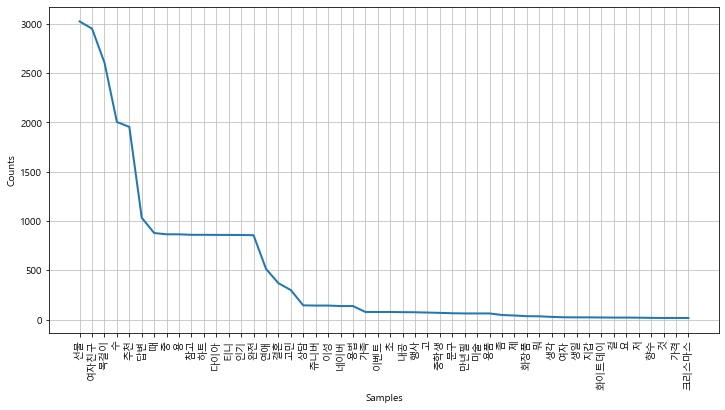

In [49]:
plt.figure(figsize=(12,6))
gifts.plot(50) 
plt.show()

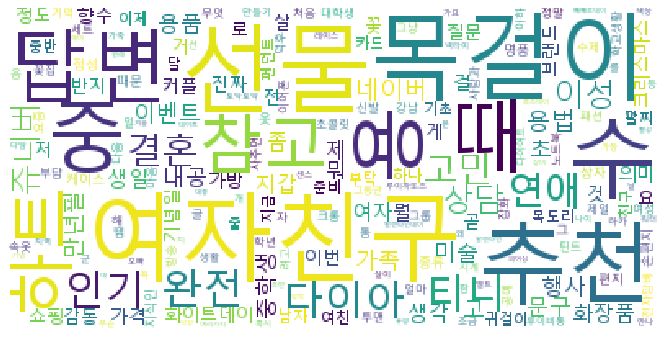

In [50]:
data = gifts.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [51]:
mask = np.array(Image.open('data/21_heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

FileNotFoundError: [Errno 2] No such file or directory: 'data/21_heart.jpg'

In [52]:

data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()


NameError: name 'ko' is not defined

In [53]:

plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'image_colors' is not defined

<Figure size 864x864 with 0 Axes>